# Stats and Plots of Recall of simulated 1000G Mosaic data
Relies heavily on functions in python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os
import sys as sys
import multiprocessing as mp
import socket as socket

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

sys.path.append("./notebook/simulate/python/")  # Assume we are in Hapsburg Root Directory
#from hmm_inference import HMM_Analyze   # Do not move. Should be after sys.path..

from load_funcs import Summary_IBD_Calls, Summary_IBD_Calls_Error, Summary_IBD_Calls_Missing,\
                       statistics_power_df, calc_power, give_SE,\
                       false_power_statistics, return_calls_only, give_bias, false_positive_nrs
from plot_funcs import plot_power, plot_fp_distribution

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

compute-e-16-229.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK
CPU Count: 28


# Plot recall Histograms
### TODO: Update the functions from ROH to IBD

In [17]:
bl_lens=[4, 8, 12, 16, 20]
#roh = Summary_ROH_Calls(mosaic_folder="./Simulated/1000G_Mosaic/YRI/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "allRef/", output=1)
roh = Summary_IBD_Calls(mosaic_folder="./output/simulated/TSI/", ch=3, nr_iid = 100, 
                        blen_cm = 0, output_prefix = "default/", output=1)

df_fp = roh.collect_fp_df()  # Call FPs
#roh = Summary_ROH_Calls_Missing(mosaic_folder="./Simulated/1000G_Mosaic/CHB/", ch=3, nr_iid = 100, blen_cm = 2, output_prefix = "", output=1, missing=0.9)
df_call_vec, df_called, power = roh.give_power_dfs(bl_lens)

Total Nr Simulated: 400
Total Nr Called: 379
Total Nr Simulated: 400
Total Nr Called: 400
Total Nr Simulated: 400
Total Nr Called: 401
Total Nr Simulated: 400
Total Nr Called: 400
Total Nr Simulated: 400
Total Nr Called: 401


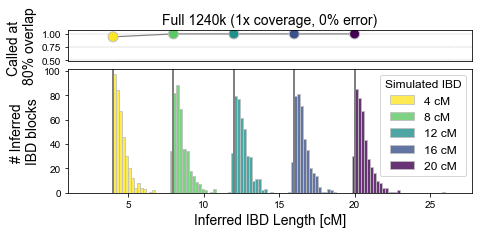

In [19]:
plot_power(bl_lens, df_called, power, df_fp=df_fp, title="Full 1240k (1x coverage, 0% error)", 
           savepath="", figsize=(7.25,3), ylim_pow=[0.49,1.08], hspace=0.1,
           fs_l=12, fs=14,
           xlim=[1,27.8])   # ./figures/manuscript/mosaic_performance/block_merging/unmerged.pdf